In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
red_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=";")
red_df['hue']='0'
white_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", delimiter=";")
white_df['hue']='1'
df_wine = pd.concat([red_df, white_df], ignore_index=True)
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,hue
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


# Logistic Regression
---
Logistic regression is a basic classification method. It is based on the logistic function which is a general form of the sigmoid function. It is an S-shaped curve that can take any real-valued number in the x-axis and values between 0 and 1 on the y axis. It can be used to classify between two classes (0 and 1). The y value expresses the probability that class 1 occurs.


<Axes: xlabel='alcohol', ylabel='quality'>

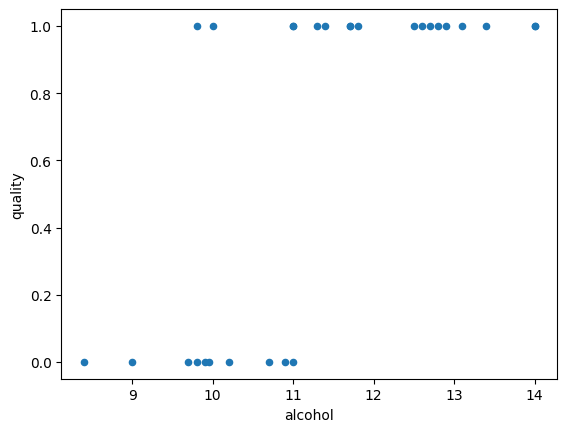

In [4]:
df_LR = red_df.loc[(red_df['quality'] == 3 ) | (red_df['quality'] == 8 ), ['alcohol','quality']]

df_LR.loc[df_LR.quality == 3, 'quality'] = 0
df_LR.loc[df_LR.quality == 8, 'quality'] = 1

df_LR.plot.scatter(x = 'alcohol', y = 'quality')

We will adjust the data using **seaborn** with the **regplot** function, which allows us to visualize how the data is adjusted to this regression. For more information, please visit the [documentation](https://seaborn.pydata.org/generated/seaborn.regplot.html 'seaborn.regplot').

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)

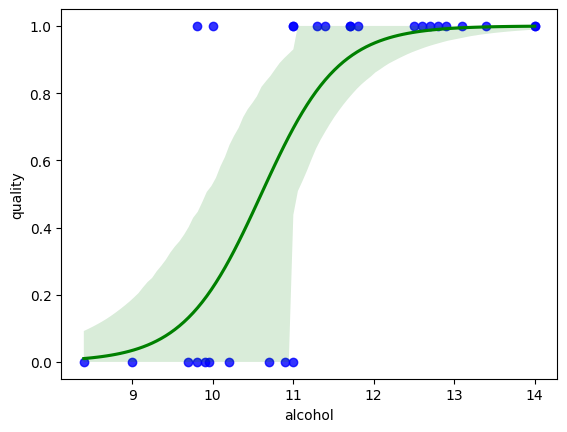

In [5]:
sns.regplot(x="alcohol", y="quality",data=df_LR, logistic=True, scatter_kws={'color': 'blue'}, line_kws={'color': 'green'})
plt.show()

Now let's do a logistic regression model using **scikit learn**. We will not use regularization to obtain similar results to those shown using **seaborn**. The regularization considered the effect of outliers in regression and is defined using the constant C. In this case, we use a value of $10^9$, so this high value turns off the regularization.

For more information, please visit the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html 'sklearn.linear_model.LogisticRegression').



In [6]:
df_LR

,alcohol,quality
267,12.80,1
278,12.60,1
390,12.90,1
440,9.80,1
455,13.40,1
459,9.00,0
481,11.70,1
495,11.00,1
498,11.00,1
517,8.40,0


In [7]:
from sklearn.linear_model import LogisticRegression
X = df_LR[['alcohol']]
y = df_LR.quality
model = LogisticRegression(C = 1e9)
model.fit(X, y)

LogisticRegression(C=1000000000.0)

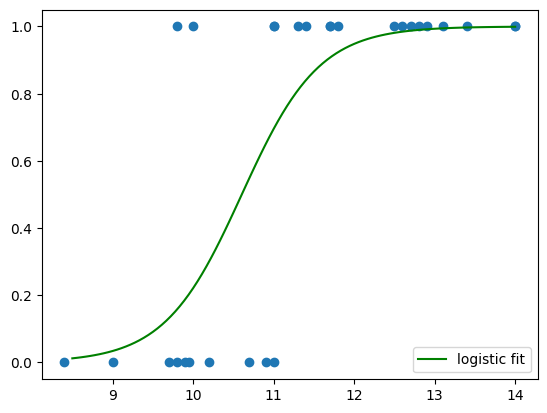

In [8]:
from scipy.special import expit
x_test = np.linspace(8.5,14.0,100)
# predict dummy y_test data based on the logistic model
y_test = x_test * model.coef_ + model.intercept_

sigmoid = expit(y_test)
plt.scatter(X,y)

# ravel to convert the 2-d array to a flat array
plt.plot(x_test,sigmoid.ravel(),c="green", label = "logistic fit")
plt.legend(loc="lower right")


# Data Spliting

In general, the data is split into two groups before generating a model. These groups are called training and testing sets. The training set is used for developing models and select the parameters that are adequate for the data. The test set is used to assess the performance of the model with previously unseen data. The most common way is to divide the data is random splitting.

We will split the dataset using the function **train_test_split** from **scikit learn**. The training set is 67% of the data and the test set is 33% (We have deliberately specified it that way in the parameters). The `random_state` parameter controls the shuffling applied to the data before applying the split.

 For more information, please visit the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html 'sklearn.model_selection.train_test_split').


In [9]:
from sklearn.model_selection import train_test_split

X = df_wine.drop(['quality', 'hue'], axis=1)
y = df_wine['hue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

---
# Data Standardization
---


Standardization is a method to transform variables that differ in mean and deviation into comparable values. This process consists of subtracting the means from each feature and then dividing by the feature standard deviation. Many machine learning algorithms assume that all features are centered around zero and have approximately the same variance, then standardization is needed.

In this case, we will use the function **StandardScaler**.  It will first fit the data to determine the mean and standard deviation and then transform it into a standardized form. There are other processes of standardization. For more information, please visit the [documentation](https://scikit-learn.org/stable/modules/preprocessing.html 'Preprocessing data')


In [10]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Multiple Logistic Regression

In this case, we will use all the features with logistic regression to classify white and red wine.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

lr = LogisticRegression(random_state=0) #random_state parameter is provided to control the random number generator used whenever randomization is part of a Scikit-learn algorithm.
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [12]:
y_pred = lr.predict(X_test)
print("Accuracy score: " + str(accuracy_score(y_test, y_pred)))
print("\nConfusion matrix: \n" + str(confusion_matrix(y_test, y_pred)))
print("\nClassification report: \n" + str(classification_report(y_test, y_pred)))

Accuracy score: 0.9888111888111888

Confusion matrix: 
[[ 544   13]
 [  11 1577]]

Classification report: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       557
           1       0.99      0.99      0.99      1588

    accuracy                           0.99      2145
   macro avg       0.99      0.98      0.99      2145
weighted avg       0.99      0.99      0.99      2145



# Performance Metrics for Classification

The metrics are the values that guide the decision in machine learning. For example, choosing what model performs better or what parameters improve a model by measuring and comparing among different cases. In this section, we are going to analyze some of the most used metrics for the classification task.

Accuracy in this context of classification problems is the number of correct predictions over the total amount of predictions. This metric is useful when the classes to classify are approximately balanced. It is expected that the accuracy is better on the training set than on the test set.

In [13]:
train_accuracy = lr.score(X_train, y_train)
test_accuracy = lr.score(X_test, y_test)
print('One-vs-rest', '-'*35,
      'Accuracy in Train Group   : {:.3f}'.format(train_accuracy),
      'Accuracy in Test  Group   : {:.3f}'.format(test_accuracy), sep='\n')

One-vs-rest
-----------------------------------
Accuracy in Train Group   : 0.995
Accuracy in Test  Group   : 0.989


## Confusion Matrix
 The Confusion Matrix is used for visualized the performance in a classification problem of two or more types of classes. For a binary case as ours, we compared the “Actual” vs “Predicted” values and obtain 4 cases:

*   TP - True Positive
*   TN - True Negative
*   FP - False Positive
*   FN - False Negative


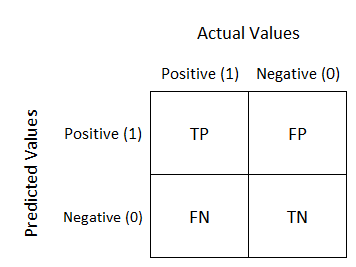

Let's plot the confusion matrix using **matplotlib**.

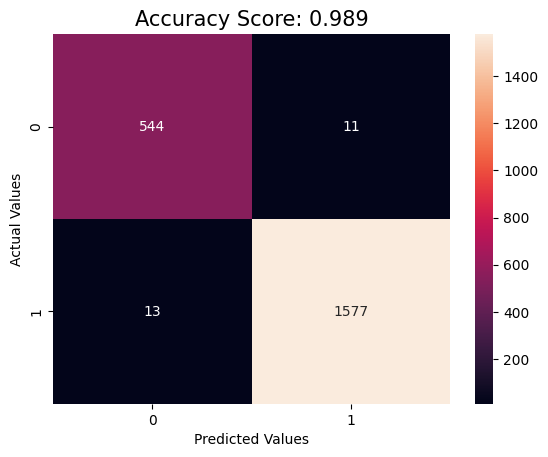

In [14]:
from sklearn.metrics import confusion_matrix as cm

predictions = lr.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(predictions, y_test)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

## Precision score
The precision is a metric that informs how many positive-predicted instances were actually positive.

$$ Precision = \frac{TP}{TP + FP}$$

In [15]:
from sklearn.metrics import precision_score

print("precision score         : ",  precision_score(y_test, predictions, average='micro'))

precision score         :  0.9888111888111888


## Recall score
The recall is a metric that informs how many instances were identified correctly of all the positive classes.

$$ Recall = \frac{TP}{TP + FN}$$

In [16]:
from sklearn.metrics import recall_score

print("recall score            : ",  recall_score(y_test, predictions, average='micro'))

recall score            :  0.9888111888111888


## F1 score
 The F1-Score is a metric that shows the harmonic mean of precision and recall.

 $$ F1_{Score} = \frac{2 \cdot Recall \cdot Precision} {Recall + Precision} $$

In [17]:
from sklearn.metrics import f1_score

precision_s = precision_score(y_test, predictions,average='micro')
recall_s    = recall_score(y_test, predictions, average='micro')


print("F1_score     : ",  2*((precision_s*recall_s)/(precision_s + recall_s)))

F1_score     :  0.9888111888111888


# Decision Tree

A decision tree is a non-linear technique that splits the dataset into subsets based on a feature value. This step is repeated recursively on each new subset until some criteria are reached. For example, every point in the subset has the same value of the target variable, or a maximum depth is attained. Choosing the feature and value to split is based on reducing the target entropy by dividing into pure subsets. For more information, please visit the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html 'sklearn.tree.DecisionTreeClassifier')
An interesting feature of the decision trees is that we can generate an scheme that shows us how the decisions that were made. For more information, please visit the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html 'sklearn.tree.plot_tree')

In [18]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 1)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("Accuracy score: " + str(accuracy_score(y_test, y_pred)))
print("\nConfusion matrix: \n" + str(confusion_matrix(y_test, y_pred)))
print("\nClassification report: \n" + str(classification_report(y_test, y_pred)))

Accuracy score: 0.9724941724941725

Confusion matrix: 
[[ 522   35]
 [  24 1564]]

Classification report: 
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       557
           1       0.98      0.98      0.98      1588

    accuracy                           0.97      2145
   macro avg       0.97      0.96      0.96      2145
weighted avg       0.97      0.97      0.97      2145



[Text(0.5, 0.875, 'x[4] <= 0.149\nentropy = 0.794\nsamples = 4352\nvalue = [1042, 3310]'),
 Text(0.25, 0.625, 'x[6] <= -1.102\nentropy = 0.197\nsamples = 3172\nvalue = [97, 3075]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[4] <= -0.239\nentropy = 0.915\nsamples = 103\nvalue = [69, 34]'),
 Text(0.0625, 0.125, 'entropy = 0.792\nsamples = 42\nvalue = [10, 32]'),
 Text(0.1875, 0.125, 'entropy = 0.208\nsamples = 61\nvalue = [59, 2]'),
 Text(0.375, 0.375, 'x[6] <= -0.43\nentropy = 0.075\nsamples = 3069\nvalue = [28, 3041]'),
 Text(0.3125, 0.125, 'entropy = 0.298\nsamples = 379\nvalue = [20, 359]'),
 Text(0.4375, 0.125, 'entropy = 0.029\nsamples = 2690\nvalue = [8, 2682]'),
 Text(0.75, 0.625, 'x[6] <= -0.466\nentropy = 0.72\nsamples = 1180\nvalue = [945, 235]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[7] <= -0.638\nentropy = 0.127\nsamples = 856\nvalue = [841.0, 15.0]'),
 Text(0.5625, 0.125, 'entropy = 0.696\nsamples = 16\nvalue = [3, 13]'),
 Text(0.6875, 0.125, 'ent

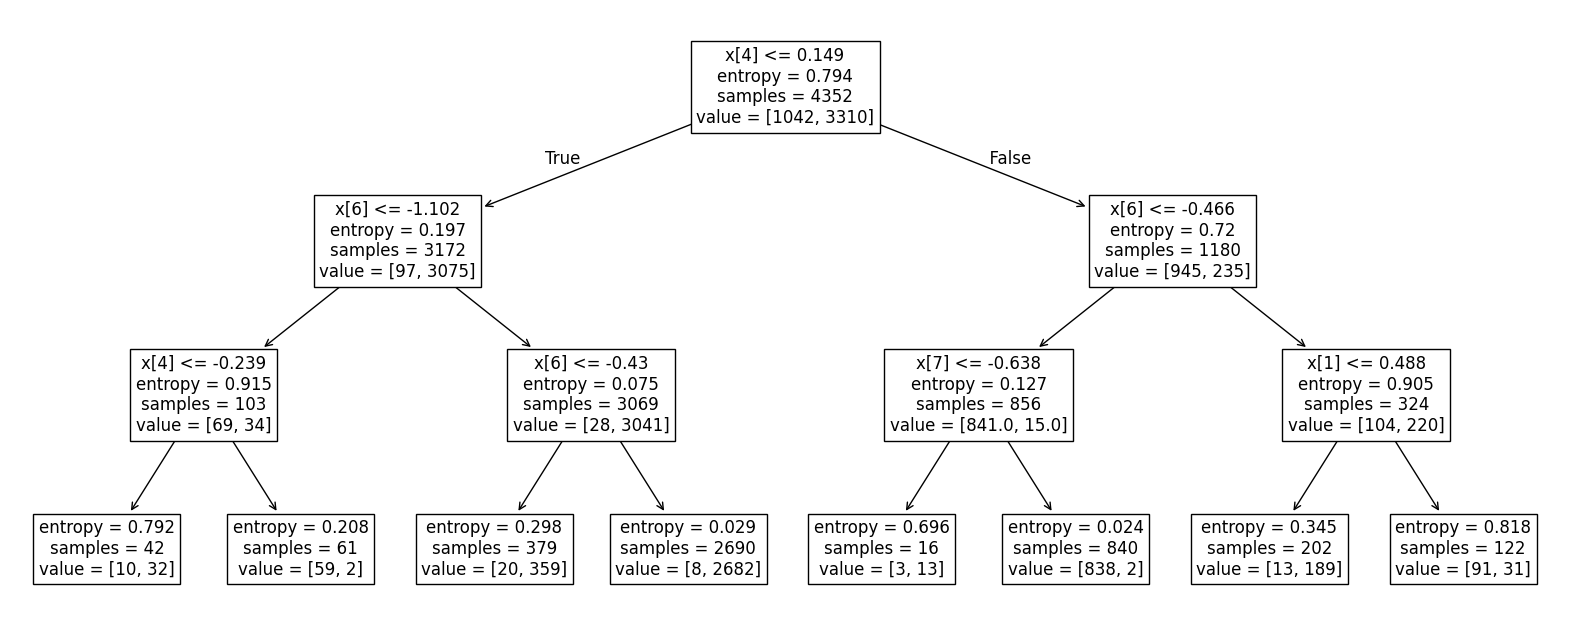

In [19]:
fig = plt.subplots(figsize=(20, 8))
tree.plot_tree(dt, fontsize=12)

## Interactive Decision Tree
We can generate an interactive Decision Tree, using ipywidget, that changes its max depth.


In [20]:
import ipywidgets as widgets
from IPython.display import display
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

value_max_depth = widgets.IntSlider(value=1, min=1, max=6, step=1, description='max_depth:')

def DecisionTree(valor):
  dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = valor, random_state = 1)
  dt.fit(X_train, y_train)
  y_pred = dt.predict(X_test)
  fig = plt.subplots(figsize=(20+4*valor, 8+valor))
  tree.plot_tree(dt, fontsize=12)


widgets.interact(DecisionTree , valor = value_max_depth);

interactive(children=(IntSlider(value=1, description='max_depth:', max=6, min=1), Output()), _dom_classes=('wi…

# Assignment

## Classification Of wines (K-nearest neighbors)

There are several different models to use for classification and each one has its benefits and limitations.  In the next exercise, we'll predict the type of wine (white or red) using the K-nearest neighbors model.

We'll use the **K-nearest neighbors** model to classify the type of wine. This algorithm can classify the different classes, e.g. red or white, according to how close their features are from each other. New data is classified by assigning the new object to the class most common among its k nearest neighbors. For more information, you can look in [An introduction to statistical learning](https://web.stanford.edu/~hastie/Papers/ESLII.pdf) by James, Witten, Hastie and Tibshirani.

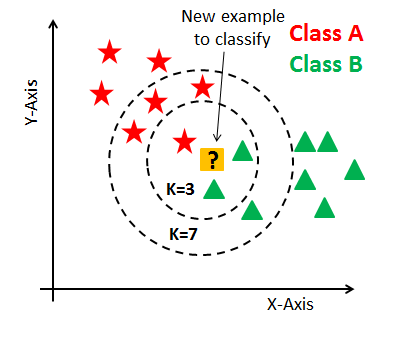

In [21]:
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,hue
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


The next thing to do is to split our data into a **train set** and **test set **using the same function we used in the notebook. The training set should be 67% of the data and the test set 33%. Remember that the target ("_y_") should be a Pandas DataFrame of only one column (it is called a Pandas Series) that indicates the type of wine. The features of the model ("_X_") should be a DataFrame with all the other columns (that provide information that influences the color of the wine) except the target.

```
from sklearn.model_selection import train_test_split

X = df.drop([...], axis=1)
y = df[...]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = ... , random_state=42)
```

In [22]:

from sklearn.model_selection import train_test_split
X = df_wine.drop(['hue'], axis=1)
y = df_wine['hue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

To make better predictions, normalize the feature data using the `StandardScaler()` function, we'll use it the same way we did on the notebook.

```
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(...)
X_train = scaler.transform(...) # Now, the X_train DataFrame is scaled
X_test = scaler.transform(...)
```


In [23]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Then we'll have to import Scikit Learn and create the _KNeighborsClassifier_ from the _sklearn.neighbors_ library. To declare the classifier we'll have to indicate the n_neighbors parameter, this is the value k and it could be, for instance, 3. In KNN, k is the number of nearest neighbors. Choosing the “right” number is important, not only because the algorithm requires such a parameter, but also because the appropriate number of nearest neighbors determines the performance of the model.


```
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = ...)
```



In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)

As we did previously in the notebook, fit the model using the train data with the `knn.fit( ... , ... )`
function.


In [25]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Now we have our trained model, the next thing to do is to evaluate the predictions made by it. To do it, predict the color of the testing set of features using the
`predict()` function, then use those predictions to calculate the accuracy score and make the confusion matrix and the classification report.

```
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
y_pred = knn.predict(...)
print("Accuracy score: " + str(accuracy_score(..., ...)))
print("\nConfusion matrix: \n" + str(confusion_matrix(..., ...)))
print("\nClassification report: \n" + str(classification_report(..., ...)))

```

In [26]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_pred = knn.predict(X_test)

print("Accuracy score: " + str(accuracy_score(y_test, y_pred)))
print("\nConfusion matrix: \n" + str(confusion_matrix(y_test, y_pred)))
print("\nClassification report: \n" + str(classification_report(y_test, y_pred)))

Accuracy score: 0.9897435897435898

Confusion matrix: 
[[ 544   13]
 [   9 1579]]

Classification report: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       557
           1       0.99      0.99      0.99      1588

    accuracy                           0.99      2145
   macro avg       0.99      0.99      0.99      2145
weighted avg       0.99      0.99      0.99      2145



Finally, according to the evaluation, you can ask yourself how good at predicting was your model. Can it be better? There are always ways to polish or optimize it. In this case, maybe there is another value for k that will improve the score of the model. Try to find it!

There are, at first sight, two ways to find it. One would be trying manually the model for different values of k and save the results to compare them. Another way would be to make the computer do that job for you! If you are feeling bold, try to create a function (as in the first notebook) that uses the wine dataset (df_wine) and the value of k as parameters and returns the score of the model by doing all the previous steps (split the data, scale it, make the model, train it and calculate the score). Then, you can evaluate the model for a range of k values (using a _for_ loop) and print the results, or even better, plot them!

Note: _If this workshop is your first time working with a programming language, this last exercise can be tricky. Don't get frustrated if it doesn't work, but rather ask the teachers and your classmates. You can continue to the next notebook without doing it._

In [27]:
def pred(data, k ):
  df = data.copy()
  X = df.drop(['hue'], axis=1)
  y = df['hue']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
  scaler = preprocessing.StandardScaler()
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)

  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)

  y_pred = knn.predict(X_test)
  score = accuracy_score(y_test, y_pred)

  #print(f"Accuracy score: " + str(score) + f' for {k}')
  return score


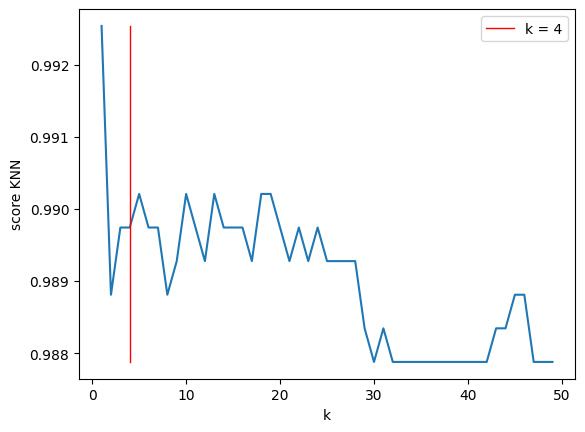

In [28]:
# Plotting using matplotlib
score = []
k = [i for i in range(1,50)]
for i in k:
  score.append(pred(df_wine,i))

k0 = 4
plt.plot(k,score)
plt.xlabel('k')
plt.ylabel('score KNN')
plt.plot([k0,k0],[min(score),max(score)],'r',lw = 1,label = f'k = {k0}')
plt.legend()
plt.show()

Did you find another value of k that could improve the performance?

A model with k = 1 may have the best performance, but be aware of it, because it can very likely be that the model is _overfitting_ the data. For more information, you can look at this [article](https://medium.com/swlh/overfitting-vs-underfitting-d742b4ffac57).